<a href="https://colab.research.google.com/github/ShanmukhVegi/Image-Classification/blob/main/Shanmukh_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required packages

In [1]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import tensorflow as tf



**NOTE** : Please enter Category Names same as folder name

In [2]:
Categories=['benign','malignant']
# print("Type y to give categories or type n to go with classification of  'benign' , 'malignant' ")

# while(True):
#   check=input()
#   if(check=='n' or check=='y'):
#     break
#   print("Please give a valid input (y/n)")
# if(check=='y'):
#   print("Enter How Many types of Images do you want to classify")
#   n=int(input())
#   Categories=[]
#   print(f'please enter {n} names')
#   for i in range(n):
#     name=input()
#     Categories.append(name)
#   print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

In [3]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='../../Data/imageClassification/data'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : benign
loaded category:benign successfully
loading... category : malignant
loaded category:malignant successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.121669,0.058971,0.040332,0.165620,0.088207,0.060846,0.220695,0.123470,0.083476,0.264814,...,0.086479,0.014113,0.004527,0.079386,0.013250,0.003922,0.078707,0.013223,0.003921,0
1,0.784372,0.424341,0.491974,0.788059,0.433831,0.478154,0.786856,0.428195,0.469158,0.780221,...,0.809006,0.546579,0.600802,0.800678,0.529119,0.586097,0.788236,0.530761,0.582375,0
2,0.872847,0.779902,0.927749,0.868336,0.777690,0.918868,0.870310,0.768456,0.913501,0.873276,...,0.784124,0.643101,0.762408,0.789239,0.661968,0.784505,0.794381,0.684622,0.806430,0
3,0.918854,0.636297,0.671305,0.915864,0.633343,0.668340,0.919032,0.627916,0.671609,0.934834,...,0.832667,0.592180,0.572972,0.832125,0.594846,0.582215,0.813260,0.577476,0.572836,0
4,0.799318,0.442443,0.514741,0.797760,0.442316,0.516139,0.802520,0.439474,0.520614,0.814379,...,0.765515,0.472924,0.542784,0.757111,0.468955,0.526154,0.752703,0.471807,0.517409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.129080,0.052872,0.059746,0.155443,0.071206,0.078795,0.197009,0.096603,0.098725,0.233986,...,0.118148,0.051742,0.052206,0.083884,0.039883,0.040903,0.064158,0.035534,0.037232,1
167,0.817624,0.802953,0.745098,0.823530,0.800000,0.745099,0.832286,0.799084,0.749018,0.834589,...,0.773188,0.723382,0.636647,0.758356,0.704317,0.632865,0.769392,0.706647,0.643901,1
168,0.731304,0.715663,0.655871,0.737262,0.721620,0.661828,0.748864,0.724141,0.667980,0.742776,...,0.775583,0.762766,0.682988,0.766748,0.758904,0.675015,0.768866,0.761023,0.671306,1
169,0.712995,0.681622,0.638485,0.706455,0.669280,0.629044,0.708736,0.669519,0.630304,0.718881,...,0.702139,0.624623,0.597172,0.669116,0.590684,0.563233,0.649476,0.571045,0.543594,1


Splitting the data into training and testing data

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


This Part of code may take a while for training the data using SVC model

In [5]:
with tf.device('GPU:0'):
    param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
    svc=svm.SVC(probability=True)
    print("The training of the model is started, please wait for while as it may take few minutes to complete")
    model=GridSearchCV(svc,param_grid)
    model.fit(x_train,y_train)
    print('The Model is trained well with the given images')
    model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


Predicting our testing data

In [6]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [7]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [8]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 97.14285714285714% accurate


Using Pickle to save the model to disk

In [9]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

Test Image Name : ./test\129.jpg


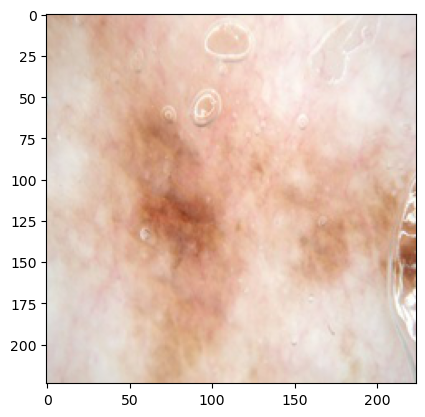

benign = 7.765738282316914%
malignant = 92.23426171768307%
The predicted image is : malignant
Is the image a malignant ?(y/n)
Thank you for your feedback


In [16]:
from matplotlib import image
from matplotlib import pyplot
import glob

#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

# url=input('Enter URL of Image')
# img=imread(url)
# open image from file
img_path = glob.glob("./test/*")[0]
img = image.imread(img_path)
print('Test Image Name : ' + img_path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
if os.path.exists(img_path):
  os.remove(img_path)


This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)